<a href="https://colab.research.google.com/github/LifeLiveOn/Pytorch-jupiterNb/blob/main/derivative%2C_partial_derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# These are the libraries will be useing for this lab.

import torch
import matplotlib.pylab as plt


In [4]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

# Take the derivative. Try to print out the derivative at the value x = 2

y.backward()
print("The dervative at x = 2: ", x.grad)
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

The tensor x:  tensor(2., requires_grad=True)
The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)
The dervative at x = 2:  tensor(4.)
data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [5]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7a651761c460>
grad: None
is_leaf: False
requires_grad: True


<ipython-input-5-3853135f74d0>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('grad:',y.grad)


In [8]:
# Calculate the y = x^2 + 2x + 1, then find the derivative
# at x = 2
x = torch.tensor(2.0,requires_grad=True)
y = x**2 + 2*x + 1
y.backward()
print("y'(2) is : ",x.grad )
print("y(2) is", y.data)

y'(2) is :  tensor(6.)
y(2) is tensor(9.)


**Partial **

In [12]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f.data)
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The result of v * u + u^2:  tensor(3.)
The partial derivative with respect to u:  tensor(4.)
The partial derivative with respect to u:  tensor(1.)


 `torch.sum()` is used here to create a single scalar value that represents the sum of squared elements of x, which is a common pattern in creating loss functions or other aggregated metrics in PyTorch.

 By using `sum()`, we simplify the backward pass, ensure proper gradient flow, and make it easier to compute gradients for complex computations involving multi-dimensional tensors.

 y = torch.sum(x**2) creates a scalar output.
y.backward() computes gradients of y with respect to x.

The gradient of each element in x is 2 times its value, due to the chain rule application through sum().

Without sum():


*   If we didn't use sum(), we'd have a tensor output instead of a scalar.
*   Initiating backpropagation on a non-scalar tensor requires specifying a gradient tensor of the same shape.




**Multiple values**


In [16]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

# Take the derivative with respect to multiple value. Plot out the function and its derivative

# y.backward()

# plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
# plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
# plt.xlabel('x')
# plt.legend()
# plt.show()

y.backward()

plt.plot(x.numpy(), Y.numpy(), label = 'function')
plt.plot(x.numpy(), x.grad.numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

The method  `detach()` excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array.

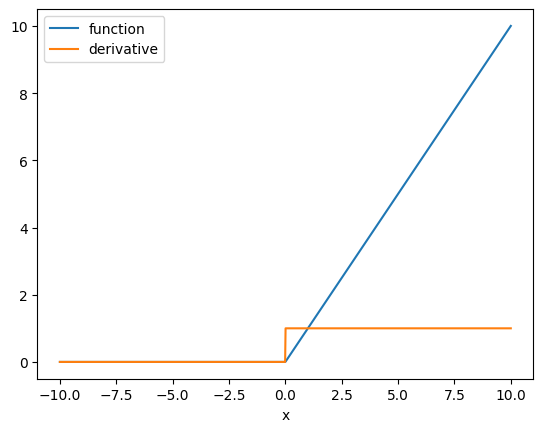

In [15]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

y.grad_fn